## Testing Python Tools for importing GPR Data

## Package obspy

In [2]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))
from config import *

from obspy.io.segy.segy import _read_segy
import numpy as np
import matplotlib.pyplot as plt
st = _read_segy(TEST_FILE_DIR / "UG3DQUERUNTERZUG.SGY")




## get the Header Information

In [3]:
binary_header = st.binary_file_header
print(binary_header)

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 49
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 400
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 3
	ensemble_fold: 1
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 1
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [13]:
for i, tr in enumerate(st.traces[:90]):  # z. B. erste 10 Traces
    print(
        f"Trace {i+1}: "
        f"X={tr.header.source_coordinate_x}, "
        f"Y={tr.header.source_coordinate_y}"
    )


Trace 1: X=0, Y=0
Trace 2: X=0, Y=0
Trace 3: X=0, Y=0
Trace 4: X=0, Y=0
Trace 5: X=0, Y=0
Trace 6: X=0, Y=0
Trace 7: X=0, Y=0
Trace 8: X=0, Y=0
Trace 9: X=0, Y=0
Trace 10: X=0, Y=0
Trace 11: X=0, Y=0
Trace 12: X=0, Y=0
Trace 13: X=0, Y=0
Trace 14: X=0, Y=0
Trace 15: X=0, Y=0
Trace 16: X=0, Y=0
Trace 17: X=0, Y=0
Trace 18: X=0, Y=0
Trace 19: X=0, Y=0
Trace 20: X=0, Y=0
Trace 21: X=0, Y=0
Trace 22: X=0, Y=0
Trace 23: X=0, Y=0
Trace 24: X=0, Y=0
Trace 25: X=0, Y=0
Trace 26: X=0, Y=0
Trace 27: X=0, Y=0
Trace 28: X=0, Y=0
Trace 29: X=0, Y=0
Trace 30: X=0, Y=0
Trace 31: X=0, Y=0
Trace 32: X=0, Y=0
Trace 33: X=0, Y=0
Trace 34: X=0, Y=0
Trace 35: X=0, Y=0
Trace 36: X=0, Y=0
Trace 37: X=0, Y=0
Trace 38: X=0, Y=0
Trace 39: X=0, Y=0
Trace 40: X=0, Y=0
Trace 41: X=0, Y=0
Trace 42: X=0, Y=0
Trace 43: X=0, Y=0
Trace 44: X=0, Y=0
Trace 45: X=0, Y=0
Trace 46: X=0, Y=0
Trace 47: X=0, Y=0
Trace 48: X=0, Y=0
Trace 49: X=0, Y=0
Trace 50: X=0, Y=0
Trace 51: X=0, Y=0
Trace 52: X=0, Y=0
Trace 53: X=0, Y=0
Tr

In [16]:
trace_headers = st.traces[42000].header
print(trace_headers)

trace_sequence_number_within_line: 42001
trace_sequence_number_within_segy_file: 42001
original_field_record_number: 52
trace_number_within_the_original_field_record: 52
energy_source_point_number: 52
ensemble_number: 52
trace_number_within_the_ensemble: 0
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 0
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: 0
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 1
scalar_to_be_applied_to_all_coordinates: 1
source_coordinate_x: 0
source_coordinate_y: 3
group_coordinate_x: 0
group_coordinate_y: 3
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_in_ms: 0
uphole_time_a

In [8]:
data = np.array([tr.data for tr in st.traces]).T  # Transpose für richtiges Orientieren

print(data.shape)  # (samples, traces)
dt = st.binary_file_header.sample_interval_in_microseconds / 1e6  # Sekunden
time = np.arange(data.shape[0]) * dt * 1e9  # in Nanosekunden (für GPR üblich)


(400, 42660)


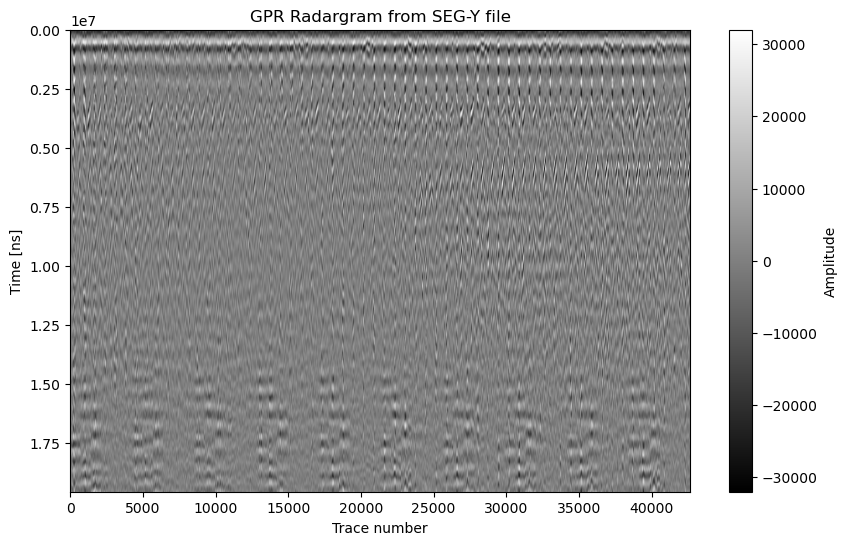

In [9]:
plt.figure(figsize=(10, 6))
plt.imshow(
    data,
    cmap="gray",             # Graustufen für typische GPR-Darstellung
    aspect="auto",
    extent=[0, data.shape[1], time[-1], time[0]],  # Trace-Nummer vs. Zeit
)
plt.xlabel("Trace number")
plt.ylabel("Time [ns]")
plt.title("GPR Radargram from SEG-Y file")
plt.colorbar(label="Amplitude")
plt.show()
